[View in Colaboratory](https://colab.research.google.com/github/derekwise/math/blob/master/Calkin_Wilf.ipynb)

#Calkin-Wilf enumeration of the rationals
**Derek Wise**

The Calkin-Wilf sequence is a nice explicit enueration of the rationals, given by traversing the [Calkin-Wilf tree](https://en.wikipedia.org/wiki/Calkin%E2%80%93Wilf_tree) in breadth-first order.  This graphic by David Eppstein illustrates this nicely:

<center><a href="https://en.wikipedia.org/wiki/Calkin%E2%80%93Wilf_tree#/media/File:Calkin-Wilf_spiral.svg" ><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Calkin-Wilf_spiral.svg/644px-Calkin-Wilf_spiral.svg.png" height=350 ></a></center>

The [original paper by Calkin and Wilf](https://www.math.upenn.edu/~wilf/website/recounting.pdf) clearly explains how this works, and why it gives an isomorphism $q\colon\mathbb{N} \to \mathbb{Q}$.  Explicitly, this isomorphism is given by: 
$$ q(n) = \frac{f(n)}{f(n+1)} \qquad (n \in \mathbb{N})$$ where $f$ is defined recursively by
$$\begin{align} f(0) &= 1 \\ 
f(2n + 1) &= f(n) \\ 
f(2n + 2) &= f(n) + f(n + 1). 
\end{align}$$

In this notebook, I give Python code to calculating the sequences f(n) and q(n).   I also plot some values of $f(n)$ and $q(n)$.  

## The function $f$

Here is an implementation of $f$ exactly as defined above, but using [dynamic programming](https://en.wikipedia.org/wiki/Dynamic_programming): storing the values of $f(n)$ as they are generated to avoid recalculation.

In [0]:
def f(n, cache={}):
  if n == 0:
    return 1
  if n not in cache:
    if n % 2 == 0:
      cache[n] = f((n / 2) - 1) + f(n / 2)
    else:
      cache[n] = f((n - 1) / 2)
  return cache[n]

In [2]:
print([f(x) for x in range(30)])

[1, 1, 2, 1, 3, 2, 3, 1, 4, 3, 5, 2, 5, 3, 4, 1, 5, 4, 7, 3, 8, 5, 7, 2, 7, 5, 8, 3, 7, 4]


## Enumeration of the rationals

In [0]:
from fractions import Fraction

def q(n):
  return Fraction(f(n), f(n + 1))


In [4]:
print([str(q(n)) for n in range(20)])

['1', '1/2', '2', '1/3', '3/2', '2/3', '3', '1/4', '4/3', '3/5', '5/2', '2/5', '5/3', '3/4', '4', '1/5', '5/4', '4/7', '7/3', '3/8']


## Calkin-Wilf tree

Rather than using the function $f$ to generate the Calkin-Wilf sequence, one can use the binary tree of rationals whose root is $1$ and whose left and right child functions are given by
$$L\colon \frac{a}{b}\mapsto   \frac{a}{a+b}
\qquad\qquad
R\colon\frac{a}{b}\mapsto  \frac{a+b}{b}$$

In [0]:
from fractions import Fraction

In [0]:
def left_child(frac):
  a = frac.numerator
  b = frac.denominator
  return Fraction('{}/{}'.format(a,a+b))

def right_child(frac):
  a = frac.numerator
  b = frac.denominator
  return Fraction('{}/{}'.format(a+b,b))

def children(frac):
  return [child(frac) for child in [left_child, right_child]]

In [66]:
children(Fraction('9/13'))

[Fraction(9, 22), Fraction(22, 13)]

In [16]:
def flatten(lst_of_lsts):
  """
  Make a flat list from a list of lists (or other sequence of sequence type)
  """
  return [x for lst in lst_of_lsts for x in lst]

level = [Fraction(1,1)]
for i in range(5):
  for frac in level:
    print('{:6}'.format(str(frac)), end='')
  print(' ')
  level = flatten(map(children, level))
  

1      
1/2   2      
1/3   3/2   2/3   3      
1/4   4/3   3/5   5/2   2/5   5/3   3/4   4      
1/5   5/4   4/7   7/3   3/8   8/5   5/7   7/2   2/7   7/5   5/8   8/3   3/7   7/4   4/5   5      


The numbers are the same as what we got before:

In [73]:
for n in range(2**5 - 1):
  print(str(q(n)), end='  ')

1  1/2  2  1/3  3/2  2/3  3  1/4  4/3  3/5  5/2  2/5  5/3  3/4  4  1/5  5/4  4/7  7/3  3/8  8/5  5/7  7/2  2/7  7/5  5/8  8/3  3/7  7/4  4/5  5  

## Plots

In [0]:
from matplotlib import pyplot as plt

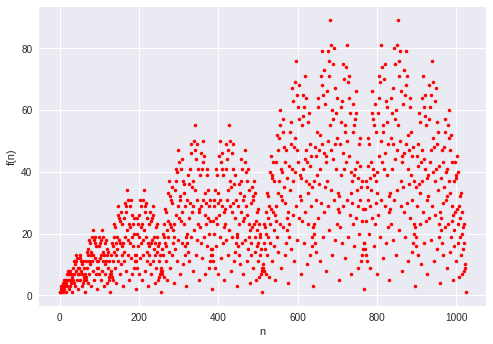

In [60]:
fs = [f(i) for i in range(2**10)]

plt.plot(fs, 'r.')
plt.xlabel('n')
plt.ylabel('f(n)')
plt.show()

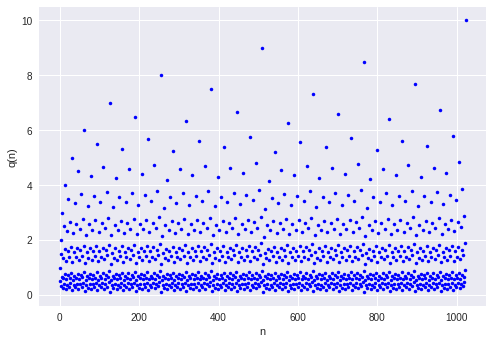

In [61]:
qs = [f(i)/f(i+1) for i in range(2**10-1)]

plt.plot(qs, 'b.')
plt.xlabel('n')
plt.ylabel('q(n)')
plt.show()

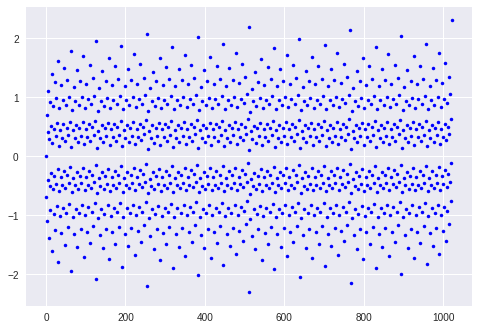

In [63]:
from numpy import log
plt.plot(log(qs), 'b.')
plt.show()

This picture is good for showing how the rationals in the enumeration seem to fall into "bands," but since there's little horizontal space between points, it's hard to see the _order_ of the points.  To see that pattern, let's look at fewer of point (the first $10^7$) and also connect them by lines:

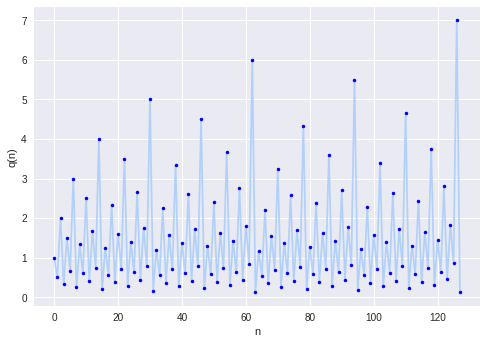

In [62]:
plt.plot(qs[:2**7], 'xkcd:powder blue')
plt.plot(qs[:2**7], 'b.')
plt.xlabel('n')
plt.ylabel('q(n)')
plt.show()

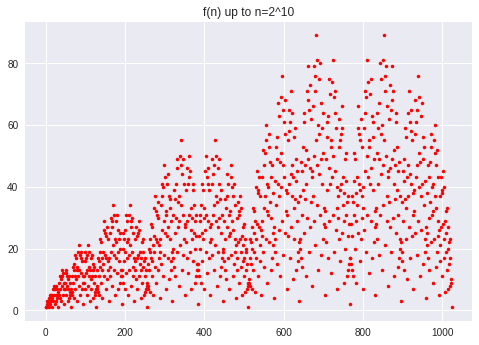

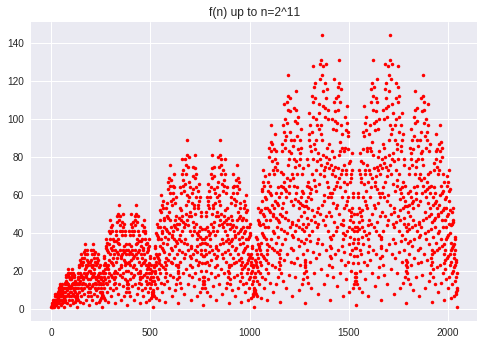

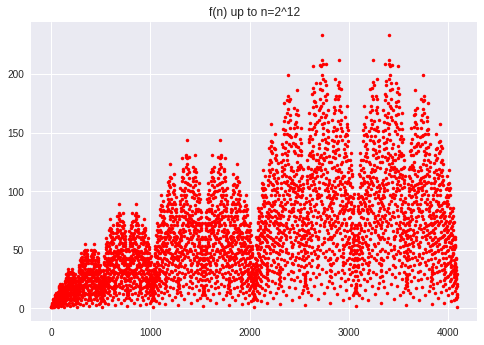

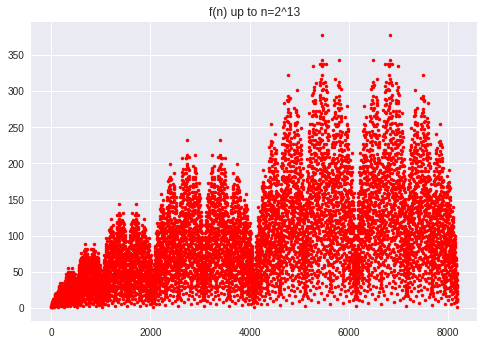

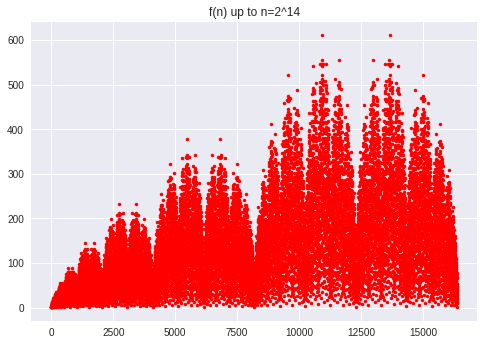

In [76]:
for k in range(10,15):
  n = 2**k
  a = list(map(f,range(n)))
  plt.plot(a, 'r.')
  plt.title('f(n) up to n=2^{}'.format(k))
  plt.show()